# Support Vector Regression (SVR)

svr needs feature scaling , SVR is implicit equation base on info equation produce , other Regressions are explicti they already have equations .

we find simple Regression line with Ordinary Least Squares method SUM (y-y^)^2 -> min

epsilon : insensitive - tube

in svr we see a tube , this tube hast width of epsilon that measure vertically ,
we don't care about errors inside tube , it give a little buffer to our model

the errors or points out of tube called Slack Variables .

if its above tube become Ei 

if its below tube become E*i

any points outside of tube is support vector , it support creation of the tube 

--

Not linear SVR : 

like RPF kernel SVR (it is higher concepts ) 

to learn you need to know , SVM Intuition , Kernel SVM , mapping to higher dimention , the kernel trick , types of kernel function , Non 



## Importing the libraries

Feature Scaling Transformation != inverse Transformation (go back to original scaling)

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [127]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [128]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [129]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [130]:
y = y.reshape(len(y),1)

In [131]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [132]:
from sklearn.preprocessing import StandardScaler
# with feature scaling without data spliting 
sc_X = StandardScaler()
# because dependent var is not 0 , 1 we need to apply feature scaling because svr is implicit equation 
# it does not bind to speicific equation and equation produce on runtime 
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [133]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [134]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [135]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y.ravel())

SVR()

## Predicting a new result

In [136]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

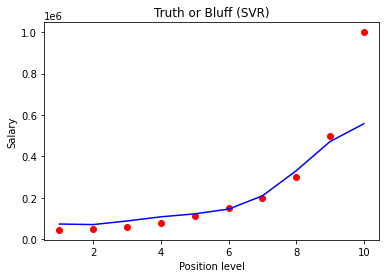

In [137]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

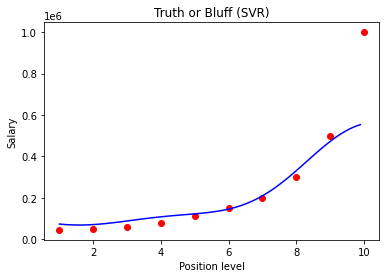

In [138]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()